In [4]:

# 📦 Step 1: Imports

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:

# 📂 Step 2: Load embeddings
X = np.load("/home/ivan/PycharmProjects/MPr/notebooks/embeddings/audio_vectors.npy")
filenames = np.load("/home/ivan/PycharmProjects/MPr/notebooks/embeddings/audio_filenames.npy")

print("✅ Loaded embeddings:", X.shape)

✅ Loaded embeddings: (300, 512)


In [10]:

# 📊 Step 3: Load FMA metadata
tracks = pd.read_csv("/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv", index_col=0, header=[0, 1])
genres = pd.read_csv("/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/genres.csv", index_col=0)

In [11]:
# Step4 

# Get track IDs from filenames: '/path/to/115/115268.mp3' → 115268
file_ids = [int(os.path.basename(f).split(".")[0]) for f in filenames]

# Lookup top-level genre name (e.g. 'Rock') using the track ID
y_labels = tracks.loc[file_ids, ("track", "genre_top")]

# Remove rows with missing genre
y_labels = y_labels.dropna()


In [12]:
# step 5

# Filter X and filenames using valid track IDs
valid_indices = y_labels.index
X_filtered = X[[file_ids.index(i) for i in valid_indices]]
y_genres = y_labels.values


In [13]:
# Step 6

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_genres)

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print("🎯 Genre classes:", label_encoder.classes_)


🎯 Genre classes: ['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock']


In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

               precision    recall  f1-score   support

   Electronic       0.71      0.86      0.77        14
 Experimental       0.60      0.60      0.60        10
         Folk       0.60      0.86      0.71         7
      Hip-Hop       1.00      0.67      0.80         3
 Instrumental       0.86      0.67      0.75         9
International       0.40      0.40      0.40         5
          Pop       0.60      0.38      0.46         8
         Rock       0.75      0.75      0.75         4

     accuracy                           0.67        60
    macro avg       0.69      0.65      0.66        60
 weighted avg       0.68      0.67      0.66        60



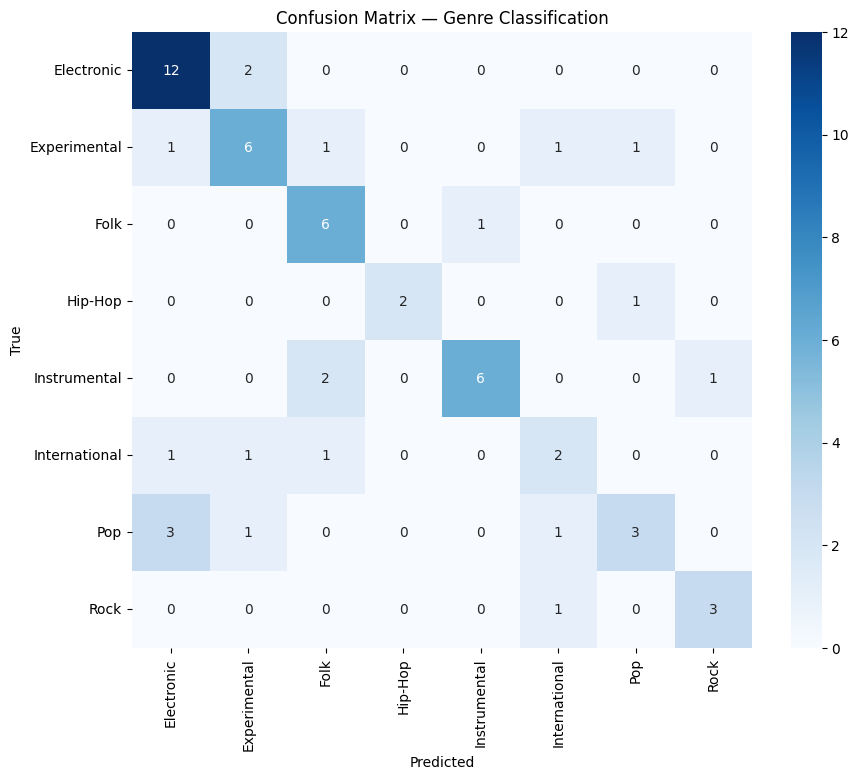

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Genre Classification")
plt.show()
